**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


## Import data

**MACS peaks**

In [2]:
### set file path
fdiry = file.path(FD_RES, "source", "starrseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End")
dat_macs_inp = read_tsv(fpath, col_names=cnames, show_col_types=FALSE) %>%
    mutate(Name = paste(Chrom, Start, End, sep="_"))

head(dat_macs_inp)

Chrom,Start,End,Name
<chr>,<dbl>,<dbl>,<chr>
chr1,10015,10442,chr1_10015_10442
chr1,14253,14645,chr1_14253_14645
chr1,16015,16477,chr1_16015_16477
chr1,17237,17772,chr1_17237_17772
chr1,28903,29613,chr1_28903_29613
chr1,30803,31072,chr1_30803_31072


**ASTARR**

In [5]:
### set file path
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Ratio.GATA1.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

### assign
dat_astarr_gata1 = dat
print(dim(dat))
head(dat)

[1] 6000453       7


Chrom,Start,End,Strand,Region,Input,Output
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
chrX,47786500,47786501,stranded_neg,GATA1,0,0
chrX,47786500,47786501,stranded_pos,GATA1,0,0
chrX,47786500,47786501,unstranded,GATA1,0,0
chrX,47786501,47786502,stranded_neg,GATA1,0,0
chrX,47786501,47786502,stranded_pos,GATA1,0,0
chrX,47786501,47786502,unstranded,GATA1,0,0


**TMPRA**

In [6]:
### set file path
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "coverage")
fname = "Tile_K562_hg38_20210130_Ratio.GATA1.stranded_pos.perbase.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

### assign
dat_tmpra_gata1 = dat
print(dim(dat))
head(dat)

[1] 1820026       6


Chrom,Start,End,Input,Output,FC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786401,47786402,2117,10474,4.947567
chrX,47786402,47786403,2117,10474,4.947567
chrX,47786403,47786404,2117,10474,4.947567
chrX,47786404,47786405,2117,10474,4.947567
chrX,47786405,47786406,2117,10474,4.947567
chrX,47786406,47786407,2117,10474,4.947567


## Preprocess

**ASTARR**

In [7]:
dat_cov = dat_astarr_gata1
dat_cov = dat_cov %>% dplyr::filter(Strand == "unstranded")

dat_lfc = dat_cov %>%
    dplyr::filter(Input  != 0) %>% 
    dplyr::filter(Output != 0) %>% 
    mutate(
        FC     = Output / Input,
        Log2FC = log2(Output / Input),
        pLog2FC_add01 = log2((Output+ 1)  / (Input+ 1)),
        pLog2FC_add10 = log2((Output+10)  / (Input+10)),
        
        pLog2FC_10neg1 = log2((Output+10^-1)   / (Input+10^-1)),
        pLog2FC_10neg2 = log2((Output+10^-2)   / (Input+10^-2)),
        pLog2FC_10neg3 = log2((Output+10^-3)   / (Input+10^-3)),
        pLog2FC_10neg4 = log2((Output+10^-4)   / (Input+10^-4)),
        pLog2FC_10neg5 = log2((Output+10^-5)   / (Input+10^-5))
    )

dat_cov_astarr = dat_cov
dat_lfc_astarr = dat_lfc
print(dim(dat_cov))
print(dim(dat_lfc))
print(range(c(dat_lfc$Start, dat_lfc$End)))
head(dat_lfc)

[1] 2000151       7
[1] 1636866      16
[1] 47787173 49786588


Chrom,Start,End,Strand,Region,Input,Output,FC,Log2FC,pLog2FC_add01,pLog2FC_add10,pLog2FC_10neg1,pLog2FC_10neg2,pLog2FC_10neg3,pLog2FC_10neg4,pLog2FC_10neg5
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47787173,47787174,unstranded,GATA1,8.23024e-07,1.014885e-06,1.233117,0.3023098,2.767966e-07,2.767968e-08,2.767943e-06,2.767714e-05,0.0002765427,0.002742765,0.02535078
chrX,47787174,47787175,unstranded,GATA1,8.23024e-07,1.014885e-06,1.233117,0.3023098,2.767966e-07,2.767968e-08,2.767943e-06,2.767714e-05,0.0002765427,0.002742765,0.02535078
chrX,47787175,47787176,unstranded,GATA1,8.23024e-07,1.014885e-06,1.233117,0.3023098,2.767966e-07,2.767968e-08,2.767943e-06,2.767714e-05,0.0002765427,0.002742765,0.02535078
chrX,47787176,47787177,unstranded,GATA1,8.23024e-07,1.014885e-06,1.233117,0.3023098,2.767966e-07,2.767968e-08,2.767943e-06,2.767714e-05,0.0002765427,0.002742765,0.02535078
chrX,47787177,47787178,unstranded,GATA1,8.23024e-07,1.014885e-06,1.233117,0.3023098,2.767966e-07,2.767968e-08,2.767943e-06,2.767714e-05,0.0002765427,0.002742765,0.02535078
chrX,47787178,47787179,unstranded,GATA1,8.23024e-07,1.014885e-06,1.233117,0.3023098,2.767966e-07,2.767968e-08,2.767943e-06,2.767714e-05,0.0002765427,0.002742765,0.02535078


**TMPRA**

In [8]:
dat_cov = dat_tmpra_gata1
dat_lfc = dat_cov %>%
    dplyr::filter(Input  != 0) %>% 
    dplyr::filter(Output != 0) %>% 
    mutate(
        Log2FC = log2(FC),
        pLog2FC_1e2 = log2((Output+  10^+2) / (Input+  10^+2)),
        pLog2FC_5e2 = log2((Output+5*10^+2) / (Input+5*10^+2)),
        pLog2FC_1e3 = log2((Output+  10^+3) / (Input+  10^+3)),
        pLog2FC_1e4 = log2((Output+  10^+4) / (Input+  10^+4)),
        pLog2FC_1e5 = log2((Output+  10^+5) / (Input+  10^+5))
    )

dat_cov_tmpra = dat_cov
dat_lfc_tmpra = dat_lfc
print(dim(dat_cov))
print(dim(dat_lfc))
print(range(c(dat_lfc$Start, dat_lfc$End)))

[1] 1820026       6
[1] 1820023      12
[1] 47786401 49786750


## Summarize MACS

In [18]:
dat1 = dat_lfc_astarr %>% 
    dplyr::mutate(
        Source  = "ASTARR",
        #pLog2FC = pLog2FC_add01) %>%
        pLog2FC = pLog2FC_10neg2) %>%
    dplyr::select(Chrom, Start, End, Input, Output, pLog2FC, Source)
dat1$pLog2FC_Z = (dat1$pLog2FC - mean(dat1$pLog2FC)) / sd(dat1$pLog2FC)

dat2 = dat_lfc_tmpra %>% 
    dplyr::mutate(
        Source  = "TMPRA",
        #pLog2FC = pLog2FC_1e4) %>%
        pLog2FC = pLog2FC_1e3) %>%
    dplyr::select(Chrom, Start, End, Input, Output, pLog2FC, Source)
dat2$pLog2FC_Z = (dat2$pLog2FC - mean(dat2$pLog2FC)) / sd(dat2$pLog2FC)

dat_cov = bind_rows(dat1, dat2)
head(dat_cov)

Chrom,Start,End,Input,Output,pLog2FC,Source,pLog2FC_Z
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
chrX,47787173,47787174,8.23024e-07,1.014885e-06,2.767714e-05,ASTARR,0.04634881
chrX,47787174,47787175,8.23024e-07,1.014885e-06,2.767714e-05,ASTARR,0.04634881
chrX,47787175,47787176,8.23024e-07,1.014885e-06,2.767714e-05,ASTARR,0.04634881
chrX,47787176,47787177,8.23024e-07,1.014885e-06,2.767714e-05,ASTARR,0.04634881
chrX,47787177,47787178,8.23024e-07,1.014885e-06,2.767714e-05,ASTARR,0.04634881
chrX,47787178,47787179,8.23024e-07,1.014885e-06,2.767714e-05,ASTARR,0.04634881


In [19]:
chrom = "chrX"
start = 47787173 
end   = 49786588

dat_ann = dat_macs_inp %>%
    dplyr::filter(Chrom == chrom, Start >= start, End <= end)
head(dat_ann)

Chrom,Start,End,Name
<chr>,<dbl>,<dbl>,<chr>
chrX,47796208,47796828,chrX_47796208_47796828
chrX,47806139,47808167,chrX_47806139_47808167
chrX,47809119,47809445,chrX_47809119_47809445
chrX,47814810,47815443,chrX_47814810_47815443
chrX,47816459,47818070,chrX_47816459_47818070
chrX,47836113,47837157,chrX_47836113_47837157


In [20]:
lst_ann = split(dat_ann, dat_ann$Name)
print(dim(dat_ann))
print(length(lst_ann))

[1] 197   4
[1] 197


In [21]:
res_macs = lapply(lst_ann, function(dat){
    ### extract
    start = dat$Start
    end   = dat$End
    idn   = dat$Name
    
    ### summarize coverage
    tmp   = dat_cov %>% 
        dplyr::filter(Start >= start, End <= end) %>%
        group_by(Source) %>%
        summarise(
            Input     = mean(Input),
            Output    = mean(Output),
            pLog2FC_Z = mean(pLog2FC_Z),
            .groups = "drop") %>%
        mutate(Name  = idn)
    return(tmp)
})

In [22]:
dat = bind_rows(res_macs)
dat = dat %>%
    dplyr::select(Name, Source, Input, Output, pLog2FC_Z) %>%
    dplyr::filter(Input > 0, Output > 0) %>%
    mutate(
        FC     = Output/Input,
        Log2FC = log2(Output/Input))

### show table
dat_res = dat
print(dim(dat))
head(dat)

[1] 394   7


Name,Source,Input,Output,pLog2FC_Z,FC,Log2FC
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX_47796208_47796828,ASTARR,2.505205e-04,4.209979e-04,0.67905530,1.6804931,0.7488846
chrX_47796208_47796828,TMPRA,3.921516e+02,2.570960e+03,1.07468709,6.5560349,2.7128235
chrX_47806139_47808167,ASTARR,1.999403e-04,2.545971e-04,0.25270920,1.2733653,0.3486464
chrX_47806139_47808167,TMPRA,3.998284e+02,1.343544e+03,0.52885285,3.3603025,1.7485911
chrX_47809119_47809445,ASTARR,1.498082e-04,1.412415e-04,0.01083213,0.9428154,-0.0849528
chrX_47809119_47809445,TMPRA,3.392270e+02,3.935902e+03,2.56027497,11.6025609,3.5363714


In [23]:
dat = dat_res
dat = dat %>% 
   dplyr::filter(Source == "ASTARR") %>% 
   dplyr::select(Name, Input)
dat_inp = dat
print(dim(dat))
head(dat)

[1] 197   2


Name,Input
<chr>,<dbl>
chrX_47796208_47796828,0.0002505205
chrX_47806139_47808167,0.0001999403
chrX_47809119_47809445,0.0001498082
chrX_47814810_47815443,0.0002484208
chrX_47816459_47818070,0.0001989044
chrX_47836113_47837157,0.0014720662


In [24]:
dat = dat_res
dat = dat %>% dplyr::select(Name, Source, pLog2FC_Z) %>% spread(Source, pLog2FC_Z)
dat = left_join(dat, dat_inp, by="Name")
print(dim(dat))
head(dat)

[1] 197   4


Name,ASTARR,TMPRA,Input
<chr>,<dbl>,<dbl>,<dbl>
chrX_47796208_47796828,0.67905530,1.0746871,0.0002505205
chrX_47806139_47808167,0.25270920,0.5288529,0.0001999403
chrX_47809119_47809445,0.01083213,2.5602750,0.0001498082
chrX_47814810_47815443,-0.34490901,1.0060220,0.0002484208
chrX_47816459_47818070,0.24053547,0.6558063,0.0001989044
chrX_47836113_47837157,5.58649939,2.6282443,0.0014720662


In [31]:
dat_res = dat_res %>% dplyr::rename(Peak=Name)
head(dat_res)

Peak,Source,Input,Output,pLog2FC_Z,FC,Log2FC
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX_47796208_47796828,ASTARR,2.505205e-04,4.209979e-04,0.67905530,1.6804931,0.7488846
chrX_47796208_47796828,TMPRA,3.921516e+02,2.570960e+03,1.07468709,6.5560349,2.7128235
chrX_47806139_47808167,ASTARR,1.999403e-04,2.545971e-04,0.25270920,1.2733653,0.3486464
chrX_47806139_47808167,TMPRA,3.998284e+02,1.343544e+03,0.52885285,3.3603025,1.7485911
chrX_47809119_47809445,ASTARR,1.498082e-04,1.412415e-04,0.01083213,0.9428154,-0.0849528
chrX_47809119_47809445,TMPRA,3.392270e+02,3.935902e+03,2.56027497,11.6025609,3.5363714


## store the table

In [32]:
fdiry = file.path(FD_RES, "track_compare")
fname = "dat_peak_inp_coverage.tsv"
fpath = file.path(fdiry, fname)

write_tsv(dat_res, fpath)

## visualize

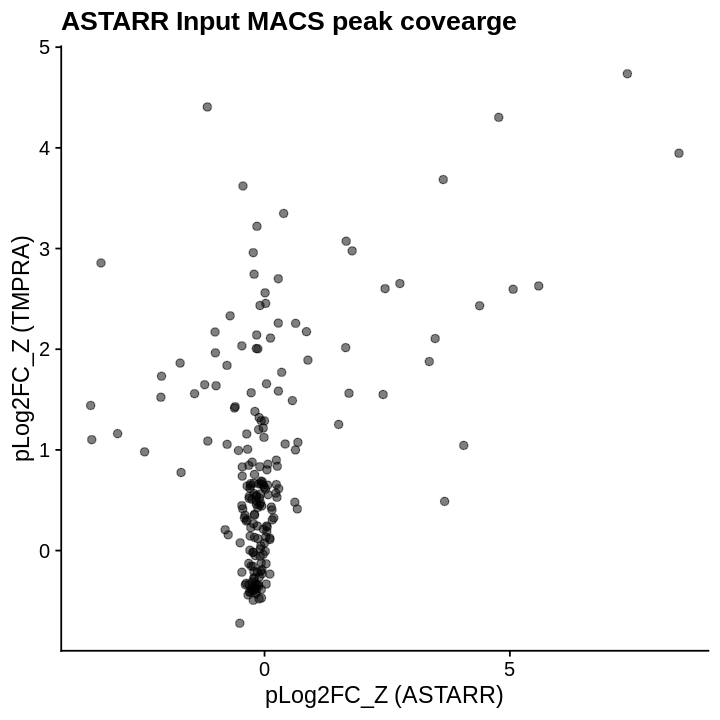

In [29]:
gpt = ggplot(dat, aes(x=ASTARR, y=TMPRA)) + 
    geom_point(size=2, alpha=0.5) + 
    theme_cowplot() +
    labs(x="pLog2FC_Z (ASTARR)", y="pLog2FC_Z (TMPRA)", title="ASTARR Input MACS peak covearge")
options(repr.plot.height=6, repr.plot.width=6)
print(gpt)

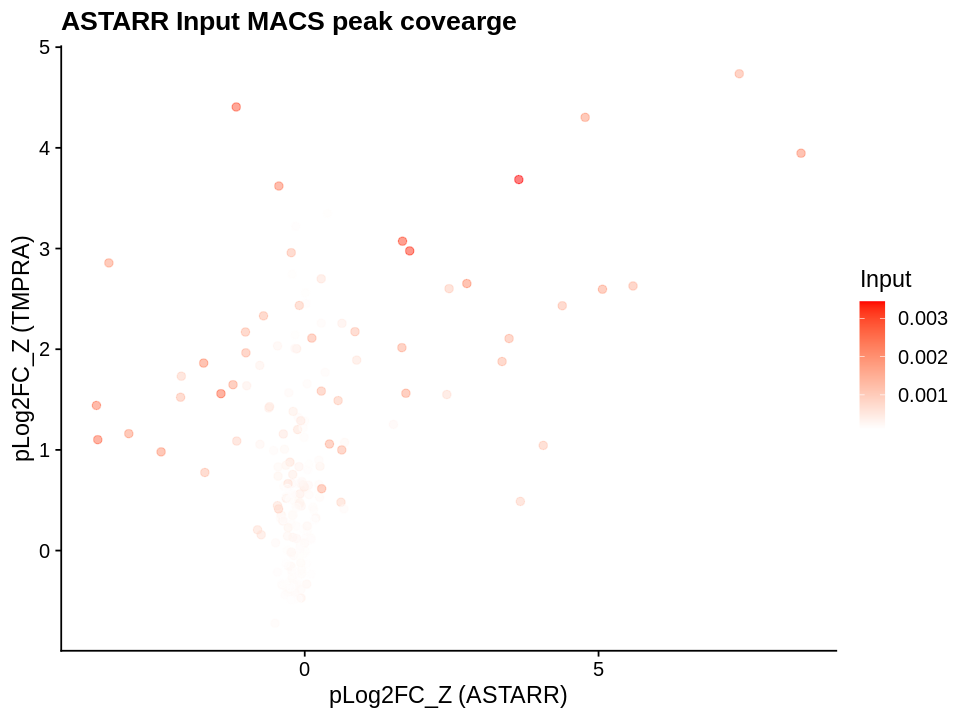

In [34]:
gpt = ggplot(dat, aes(x=ASTARR, y=TMPRA, color=Input)) + 
    geom_point(size=2, alpha=0.5) + 
    scale_colour_gradient(
        low = "white",
        high = "red") + 
        theme_cowplot() +
    labs(x="pLog2FC_Z (ASTARR)", y="pLog2FC_Z (TMPRA)", title="ASTARR Input MACS peak covearge")
options(repr.plot.height=6, repr.plot.width=8)
print(gpt)

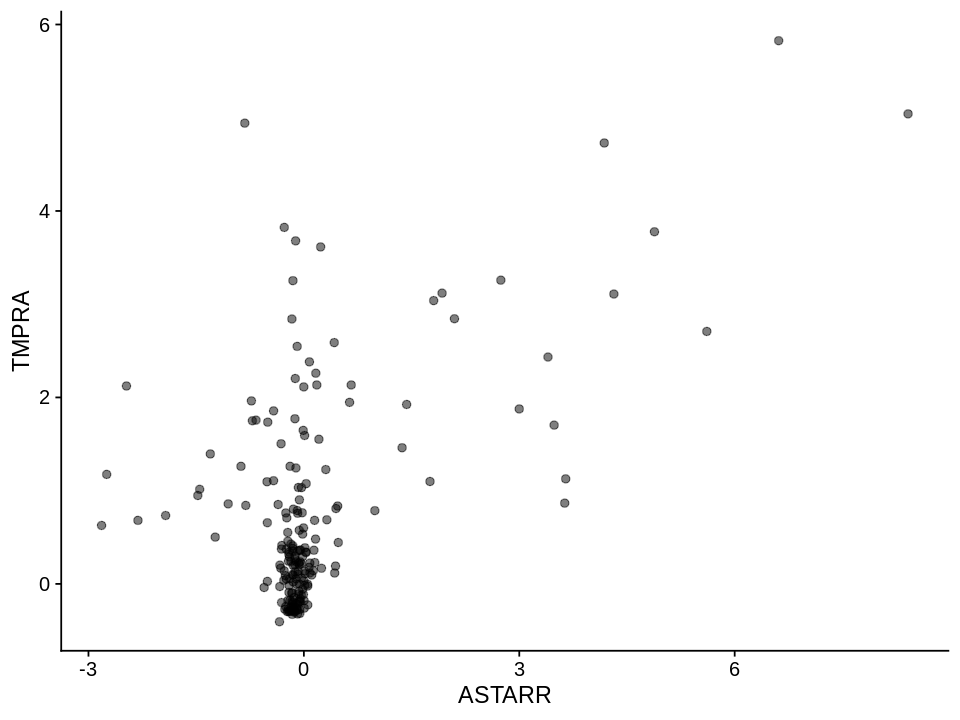

In [75]:
gpt = ggplot(dat, aes(x=ASTARR, y=TMPRA)) + 
    geom_point(size=2, alpha=0.5) + 
    theme_cowplot()
options(repr.plot.height=6, repr.plot.width=8)
print(gpt)

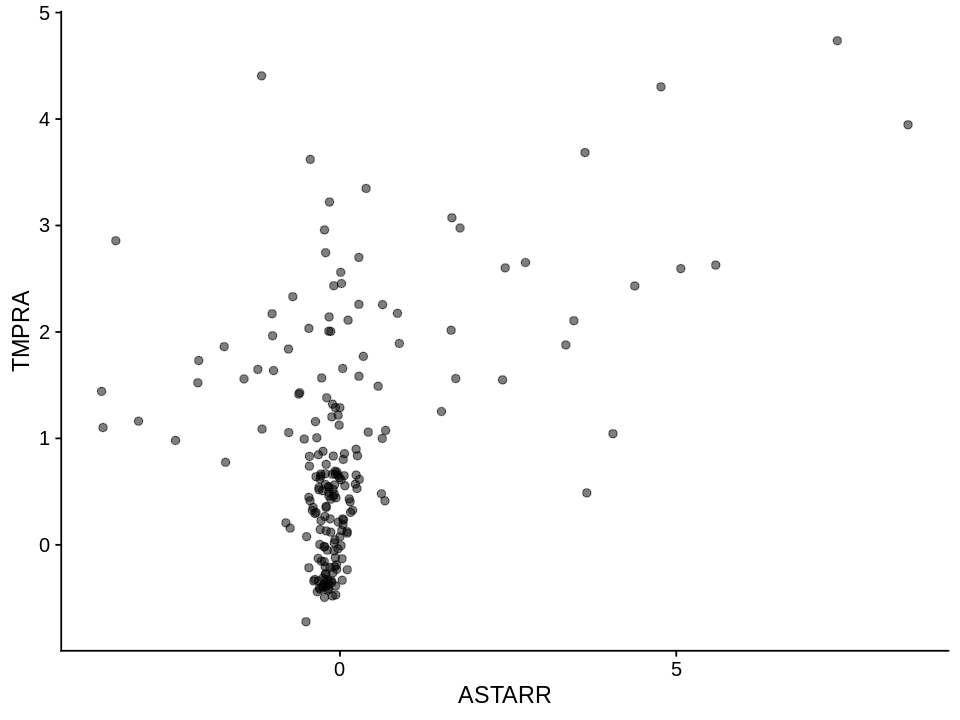

In [67]:
gpt = ggplot(dat, aes(x=ASTARR, y=TMPRA)) + 
    geom_point(size=2, alpha=0.5) + 
    theme_cowplot()
options(repr.plot.height=6, repr.plot.width=8)
print(gpt)

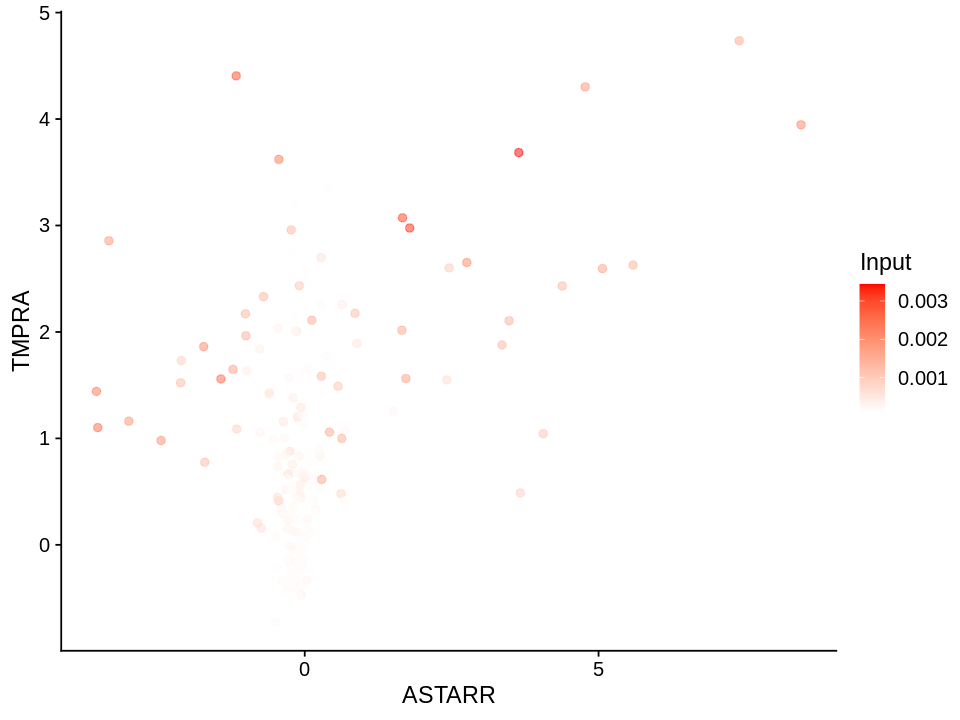

In [45]:
gpt = ggplot(dat, aes(x=ASTARR, y=TMPRA, color=Input)) + 
    geom_point(size=2, alpha=0.5) + 
    scale_colour_gradient(
        low = "white",
        high = "red") + 
        theme_cowplot()
options(repr.plot.height=6, repr.plot.width=8)
print(gpt)

In [49]:
dat = dat %>% dplyr::arrange(-Input)
dat$Name = factor(dat$Name, levels=dat$Name)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


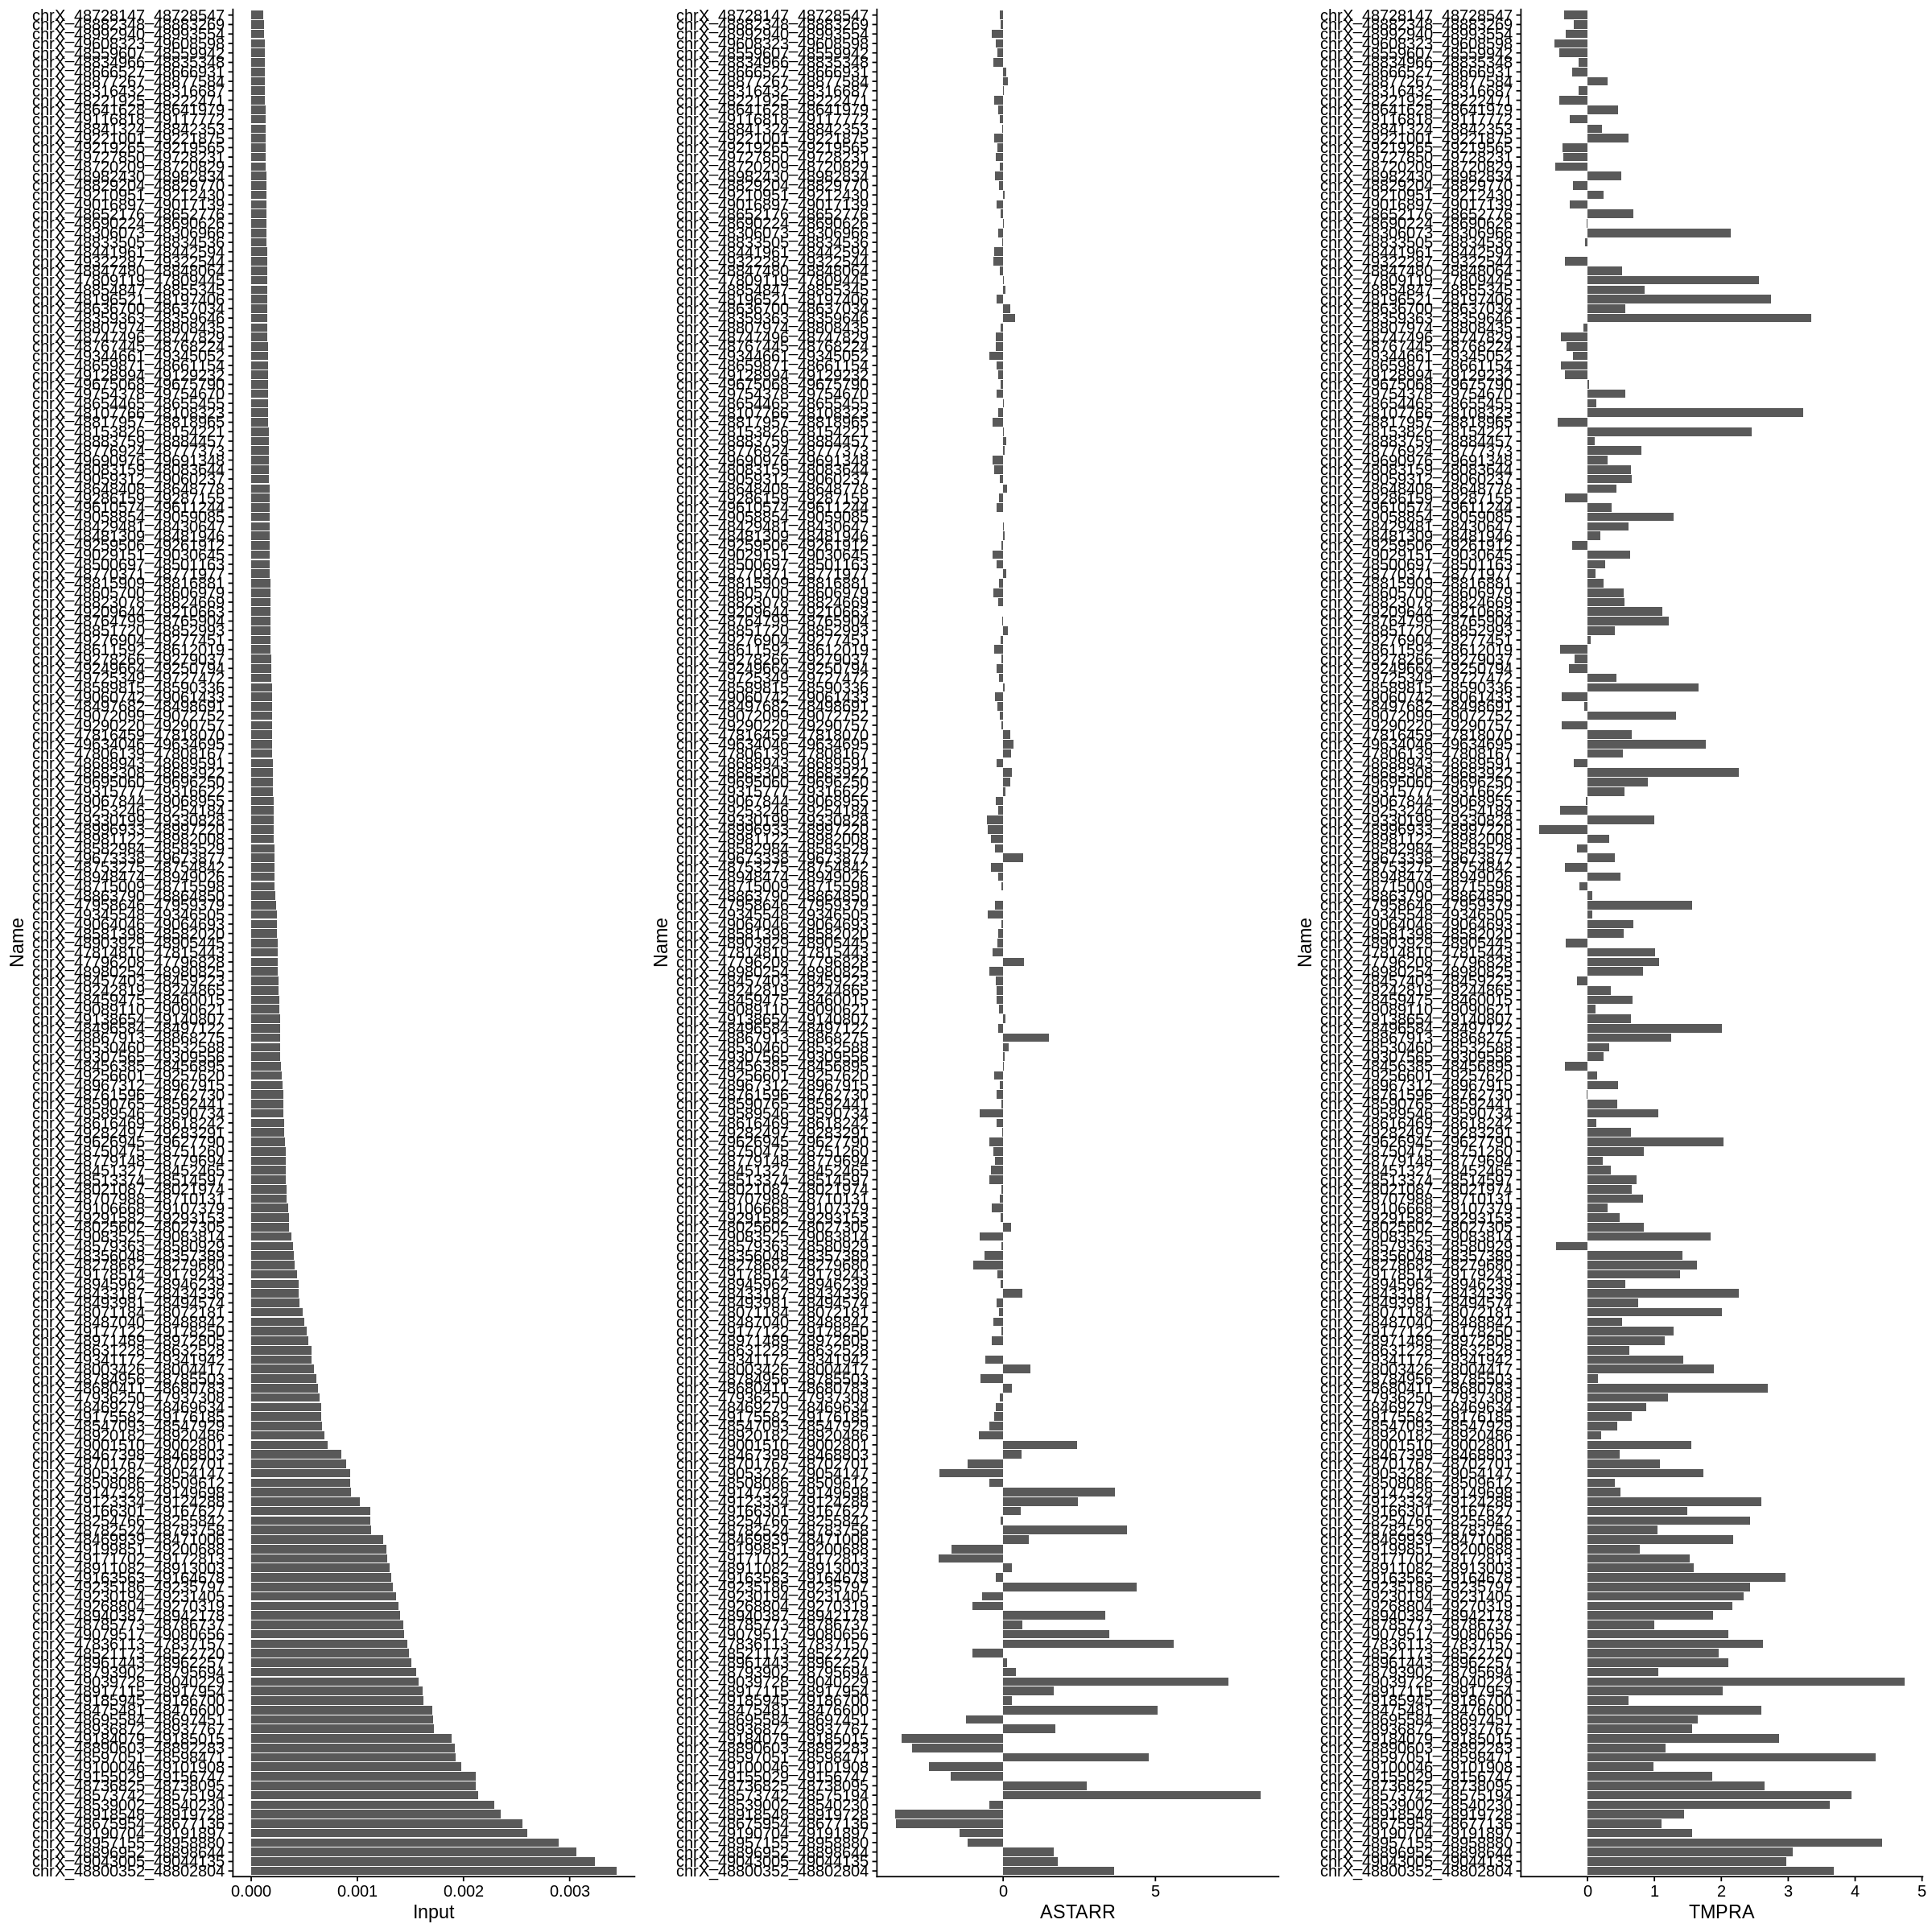

In [65]:
#dat 

gp1 = ggplot(dat, aes(x=Name, y=Input)) + 
    geom_histogram(stat="identity") + 
    theme_cowplot() + 
    coord_flip()


gp2 = ggplot(dat, aes(x=Name, y=ASTARR)) + 
    geom_histogram(stat="identity") + 
    theme_cowplot() + 
    coord_flip()

gp3 = ggplot(dat, aes(x=Name, y=TMPRA)) + 
    geom_histogram(stat="identity") + 
    theme_cowplot() + 
    #theme(axis.text.y = element_text(size=5)) +
    coord_flip()


options(repr.plot.height=20, repr.plot.width=20)
plot_grid(gp1, gp2, gp3, align="h", nrow=1)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Coordinate system already present. Adding new coordinate system, which will replace the existing one.



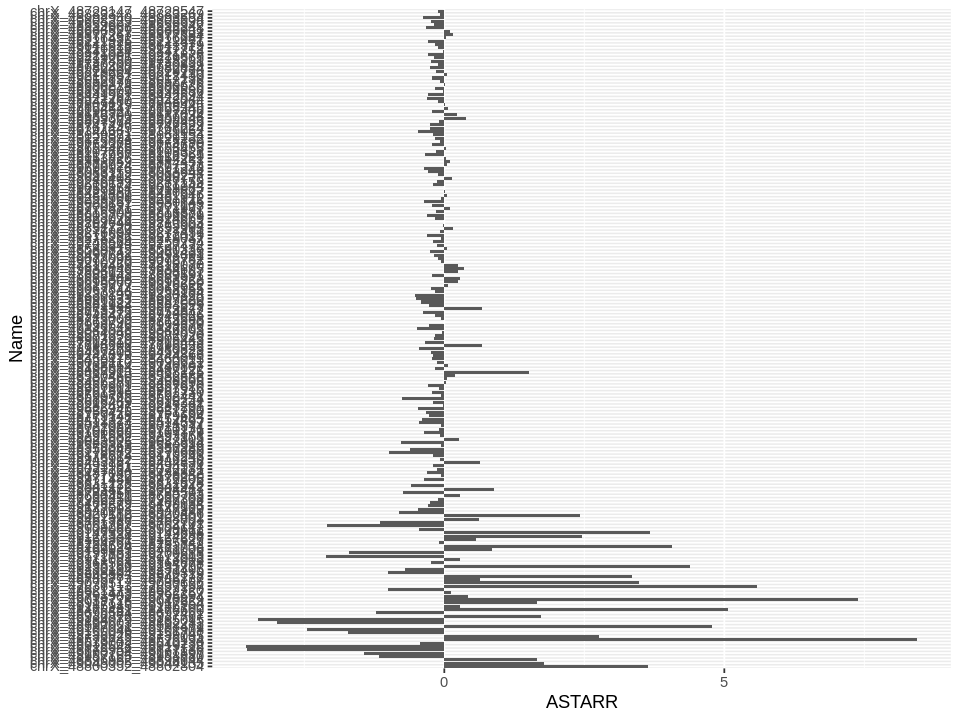

In [55]:
gp1 = ggplot(dat, aes(x=Name, y=ASTARR)) + 
    geom_histogram(stat="identity") + 
gp1

In [104]:
dat = dat_res
dat = dat %>% dplyr::select(CCRE, Label, Source, pLog2FC_Z) %>% spread(Source, pLog2FC_Z)
head(dat)

CCRE,Label,ASTARR,TMPRA
<chr>,<chr>,<dbl>,<dbl>
EH38E2753817,Low-DNase,0.41078278,0.3236983
EH38E2753819,Low-DNase,-0.05214242,-0.1030078
EH38E2753820,Low-DNase,-0.01971435,-0.2163386
EH38E2753821,Low-DNase,-0.11320839,-0.3013318
EH38E2753823,Low-DNase,0.18500516,0.3227806
EH38E2753824,Low-DNase,0.89686333,1.0955594


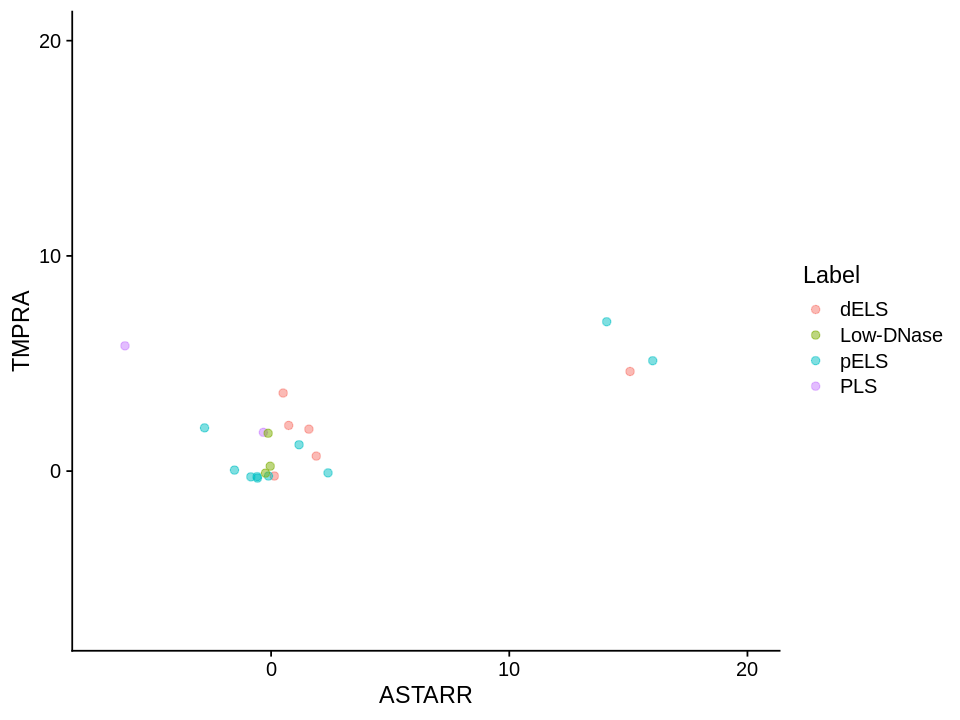

In [101]:
gpt = ggplot(dat, aes(x=ASTARR, y=TMPRA, color=Label)) + 
    geom_point(size=2, alpha=0.5) + 
    xlim(-7, 20) +
    ylim(-7, 20) +
    theme_cowplot()
options(repr.plot.height=6, repr.plot.width=8)
print(gpt)

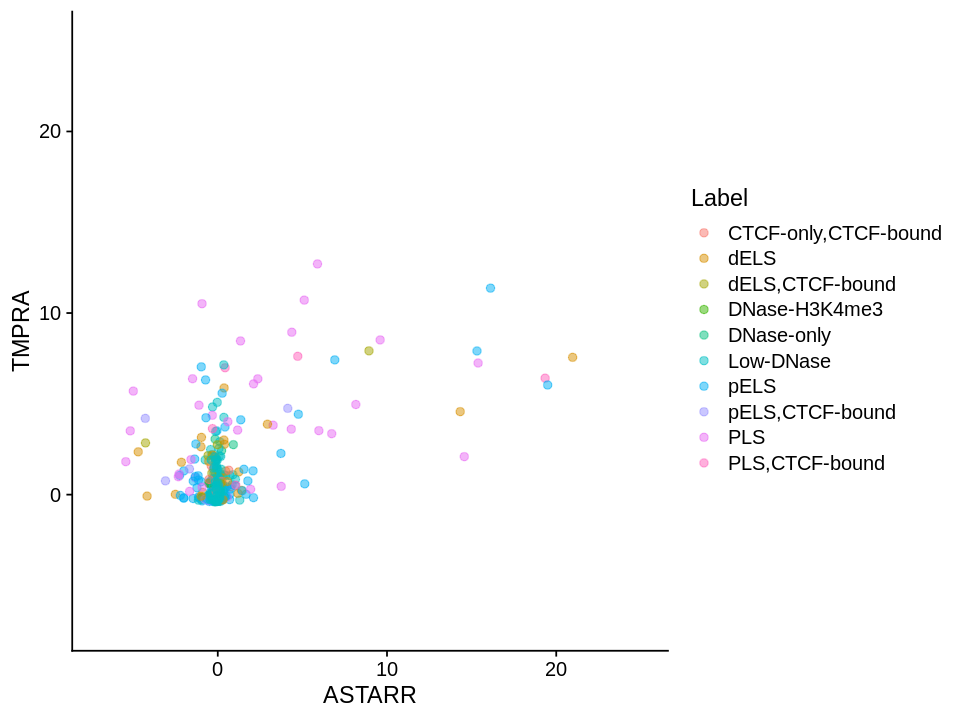

In [106]:
gpt = ggplot(dat, aes(x=ASTARR, y=TMPRA, color=Label)) + 
    geom_point(size=2, alpha=0.5) + 
    xlim(-7, 25) +
    ylim(-7, 25) +
    theme_cowplot()
options(repr.plot.height=6, repr.plot.width=8)
print(gpt)

## visualize ASTARR

In [5]:
start  = 48780000
end    = 48826000
cnt    = mean(dat_astarr_gata1$Input)

dat = dat_astarr_gata1
dat = dat %>%
    dplyr::filter(Start >= start, End < end) %>%
    dplyr::filter(Strand == "unstranded")

### assign
dat_cov_astarr = dat
print(dim(dat))
head(dat)

[1] 45999     7


Chrom,Start,End,Strand,Region,Input,Output
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
chrX,48780000,48780001,unstranded,GATA1,0.0001916078,0.0001677807
chrX,48780001,48780002,unstranded,GATA1,0.0001797762,0.0001209439
chrX,48780002,48780003,unstranded,GATA1,0.0001809119,0.0001250035
chrX,48780003,48780004,unstranded,GATA1,0.0001768448,0.0001116722
chrX,48780004,48780005,unstranded,GATA1,0.0001768448,0.0001116722
chrX,48780005,48780006,unstranded,GATA1,0.0001768448,0.0001113339


In [6]:
dat_cov_astarr %>% dplyr::filter(Input != 0) %>% dim

[1] 45999     7

In [7]:
print(cnt)
print(round(cnt, 4))

[1] 8.146763e-05
[1] 1e-04


In [8]:
dat = dat_cov_astarr
dat = dat %>% 
    dplyr::filter(Input != 0) %>% 
    mutate(
        FC     = Output / Input,
        Log2FC = log2(Output / Input),
        pLog2FC_add01 = log2((Output+ 1)  / (Input+ 1)),
        pLog2FC_add10 = log2((Output+10)  / (Input+10)),
        
        pLog2FC_10neg1 = log2((Output+10^-1)   / (Input+10^-1)),
        pLog2FC_10neg2 = log2((Output+10^-2)   / (Input+10^-2)),
        pLog2FC_10neg3 = log2((Output+10^-3)   / (Input+10^-3)),
        pLog2FC_10neg4 = log2((Output+10^-4)   / (Input+10^-4)),
        pLog2FC_10neg5 = log2((Output+10^-5)   / (Input+10^-5))
    )

###
dat$FC_Z = (dat$FC - mean(dat$FC)) / sd(dat$FC)

### assign
dat_lfc_astarr = dat
print(dim(dat))
head(dat)

[1] 45999    17


Chrom,Start,End,Strand,Region,Input,Output,FC,Log2FC,pLog2FC_add01,pLog2FC_add10,pLog2FC_10neg1,pLog2FC_10neg2,pLog2FC_10neg3,pLog2FC_10neg4,pLog2FC_10neg5,FC_Z
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,48780000,48780001,unstranded,GATA1,0.0001916078,0.0001677807,0.8756464,-0.1915797,-3.436909e-05,-3.437465e-06,-0.0003431361,-0.003376848,-0.02914012,-0.1229774,-0.1814529,0.01669679
chrX,48780001,48780002,unstranded,GATA1,0.0001797762,0.0001209439,0.6727471,-0.5718639,-8.486431e-05,-8.487580e-06,-0.0008474965,-0.008362000,-0.07379914,-0.3405931,-0.5353501,-0.36371433
chrX,48780002,48780003,unstranded,GATA1,0.0001809119,0.0001250035,0.6909634,-0.5333188,-8.064641e-05,-8.065751e-06,-0.0008053556,-0.007944380,-0.06997183,-0.3201702,-0.4999102,-0.32956091
chrX,48780003,48780004,unstranded,GATA1,0.0001768448,0.0001116722,0.6314703,-0.6632132,-9.401056e-05,-9.402276e-06,-0.0009388868,-0.009268735,-0.08219257,-0.3872453,-0.6188404,-0.44110315
chrX,48780004,48780005,unstranded,GATA1,0.0001768448,0.0001116722,0.6314703,-0.6632132,-9.401056e-05,-9.402276e-06,-0.0009388868,-0.009268735,-0.08219257,-0.3872453,-0.6188404,-0.44110315
chrX,48780005,48780006,unstranded,GATA1,0.0001768448,0.0001113339,0.6295573,-0.6675903,-9.449856e-05,-9.451081e-06,-0.0009437619,-0.009317002,-0.08263167,-0.3895529,-0.6228572,-0.44468969


In [9]:
mycolors = c(
    "#8dd3c7", #01
    "#ffffb3", #02
    "#bebada", #03
    "#fb8072", #04
    "#80b1d3", #05
    "#fdb462", #06
    "#b3de69", #07
    "#fccde5", #08
    "#d9d9d9", #09
    "#bc80bd", #10
    "#ccebc5", #11
    "#ffed6f", #12
    "#1f78b4",
    "#b2df8a",
    "#33a02c",
    "#fb9a99",
    "#e31a1c",
    "#ff7f00",
    "#cab2d6",
    "#6a3d9a",
    "#b15928")

In [10]:
### get ccre at around GATA1 gene
dat_ann = dat_ccre %>% dplyr::filter(Chrom == "chrX", Start >= start, End < end)

### add color
#dat_ann$Color = tol21rainbow
dat_ann$Color = mycolors

### show table
print(dim(dat_ann))
head(dat_ann)

[1] 21  6


Chrom,Start,End,Name,Label,Color
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chrX,48782936,48783167,EH38E2754140,dELS,#8dd3c7
chrX,48785136,48785352,EH38E2754144,pELS,#ffffb3
chrX,48785356,48785641,EH38E2754145,pELS,#bebada
chrX,48785832,48786141,EH38E2754146,pELS,#fb8072
chrX,48786328,48786666,EH38E2754147,PLS,#80b1d3
chrX,48787650,48787962,EH38E2754149,pELS,#fdb462


In [11]:
dat_cov = dat_cov_astarr
dat_lfc = dat_lfc_astarr
gp1 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=FC))
gp4 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=Log2FC))
gp5 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=pLog2FC_add01))

lst = list(gp1, gp2, gp3, gp4, gp5)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = dat_ann$Color,
            alpha=0.5) +
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

lst[[1]] = lst[[1]] + labs(title="ATAC-STARR ChrX:48,780,000-48,826,000")
lst[[5]] = lst[[5]] + labs(y = "PseudoLog2FC\n(pcount=1.0)")

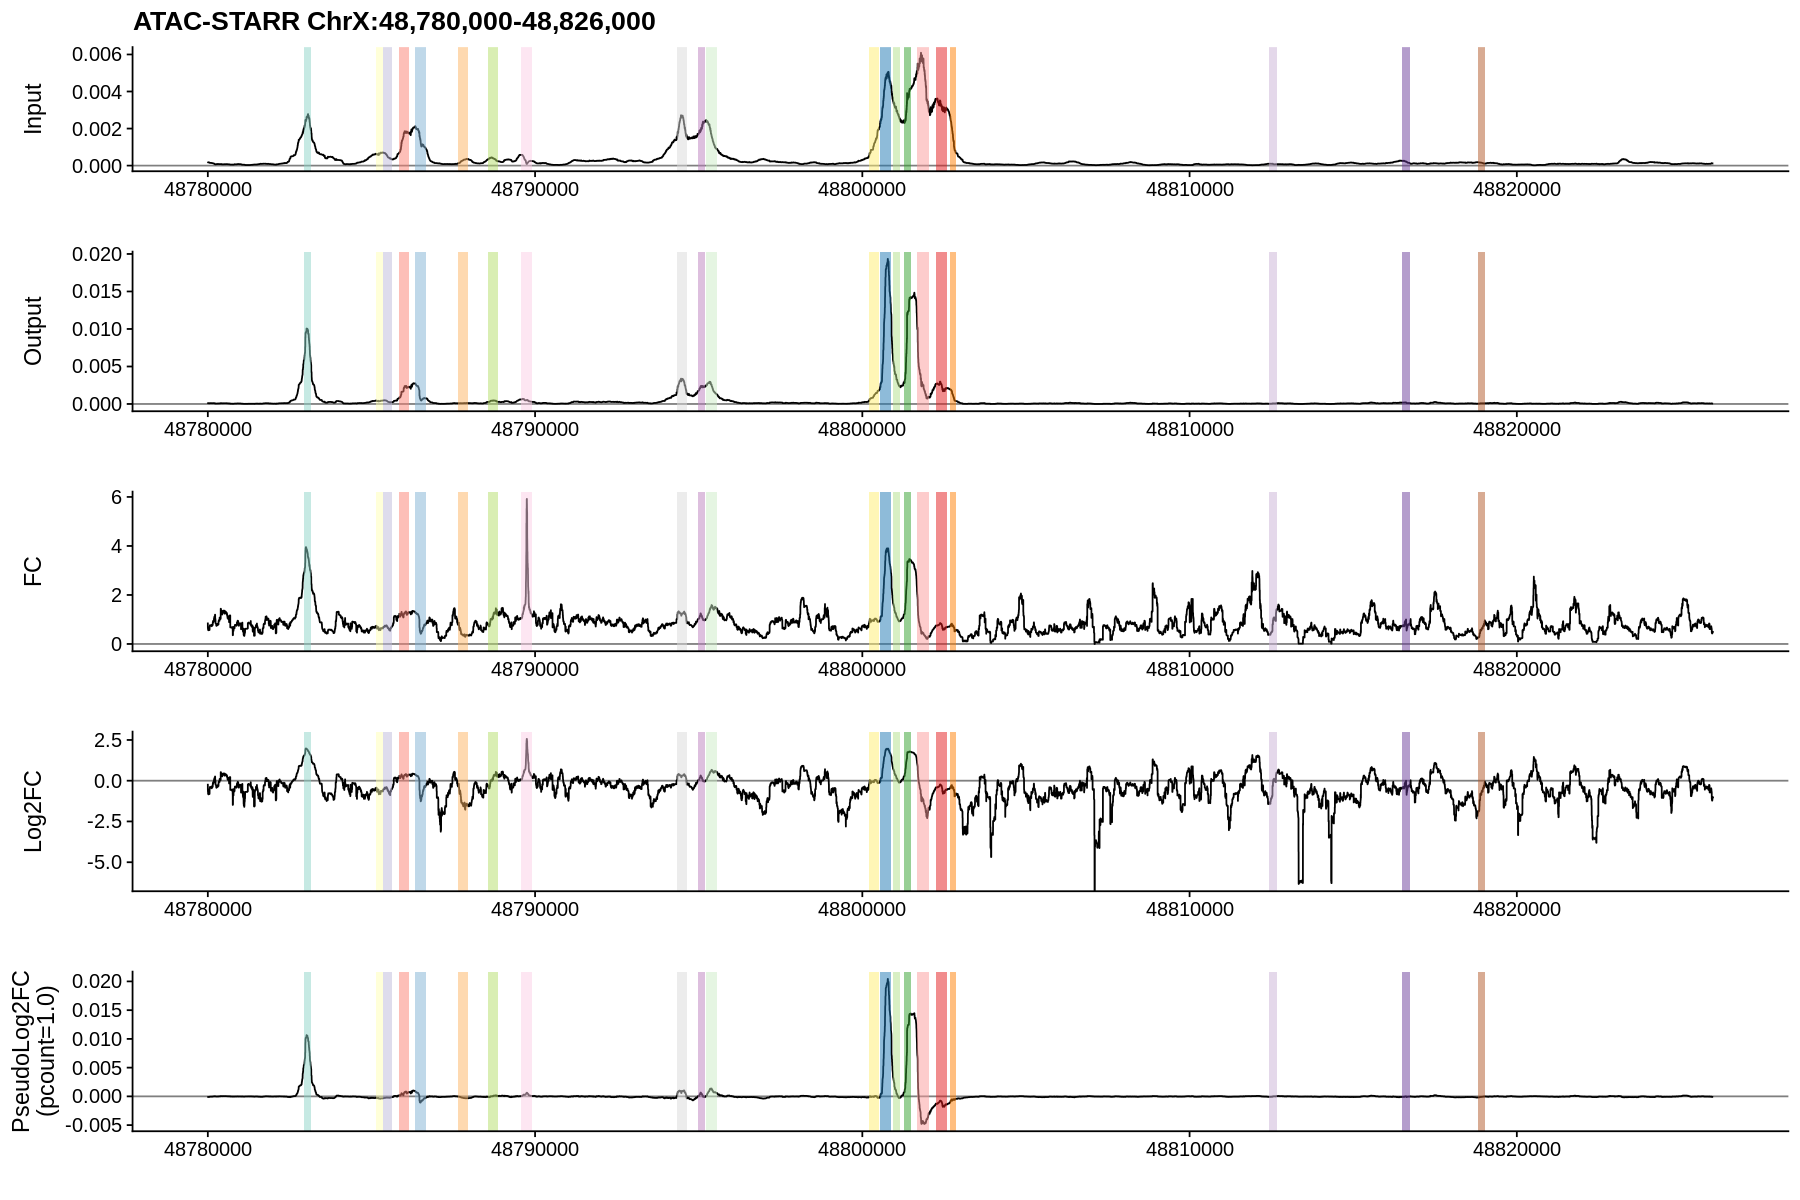

In [12]:
options(repr.plot.height=10, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [13]:
dat_cov = dat_cov_astarr
dat_lfc = dat_lfc_astarr
gp1 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=FC))
gp4 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=FC_Z))

lst = list(gp1, gp2, gp3, gp4)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = dat_ann$Color,
            alpha=0.5) +
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

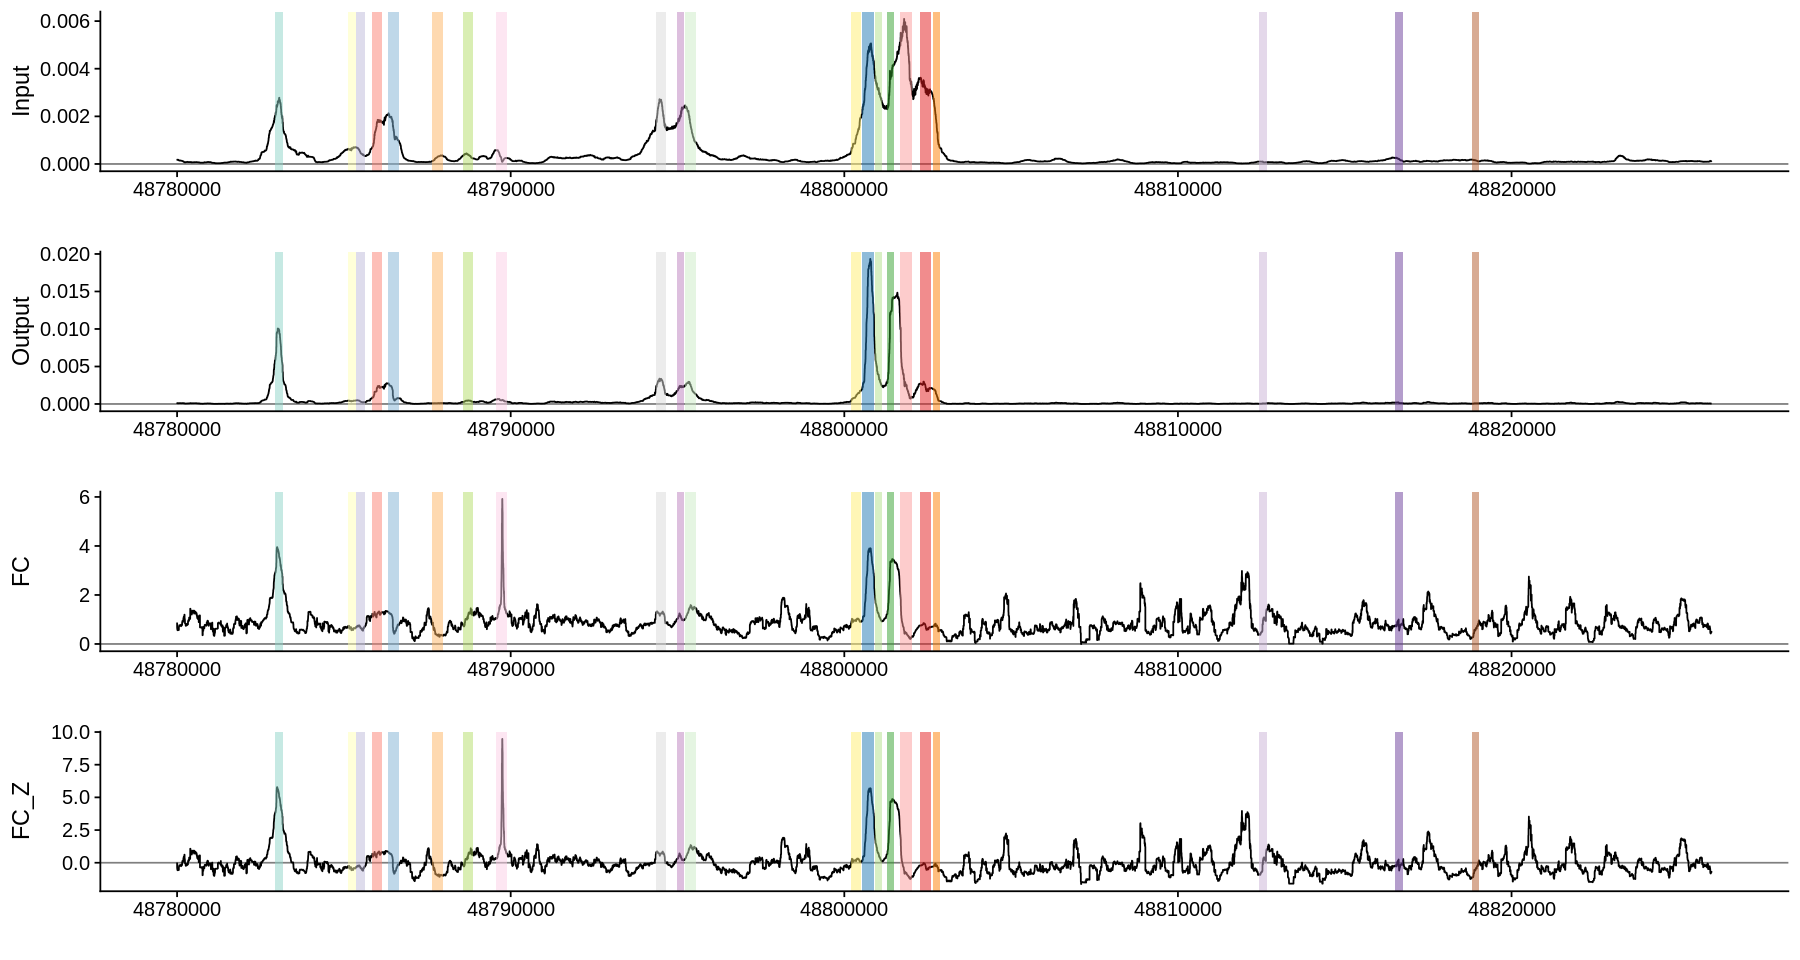

In [14]:
options(repr.plot.height=8, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [15]:
dat_lfc = dat_lfc_astarr
gp1 = ggplot(dat_lfc, aes(x=Start, y=Log2FC))
gp2 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_10neg5))
gp3 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_10neg4))
gp4 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_10neg3))
gp5 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_10neg2))
gp6 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_10neg1))
gp7 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_add01))
gp8 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_add10))

lst = list(gp1, gp2, gp3, gp4, gp5, gp6, gp7, gp8)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        theme_cowplot()
    return(gpt)
})

txt = "pLog2FC = log2( (Output + cnt) / (Input + cnt) )"
lst[[1]] = lst[[1]] + labs(x="", y="", title="Log2FC")
lst[[2]] = lst[[2]] + labs(x="", y="", title="pseudoLog2FC (10^-5)")
lst[[3]] = lst[[3]] + labs(x="", y="", title="pseudoLog2FC (10^-4)")
lst[[4]] = lst[[4]] + labs(x="", y="", title="pseudoLog2FC (10^-3)")
lst[[5]] = lst[[5]] + labs(x="", y="", title="pseudoLog2FC (10^-2)")
lst[[6]] = lst[[6]] + labs(x="", y="", title="pseudoLog2FC (10^-1)")
lst[[7]] = lst[[7]] + labs(x="", y="", title="pseudoLog2FC (10^+0 =  1)")
lst[[8]] = lst[[8]] + labs(x="", y="", title="pseudoLog2FC (10^+1 = 10)")

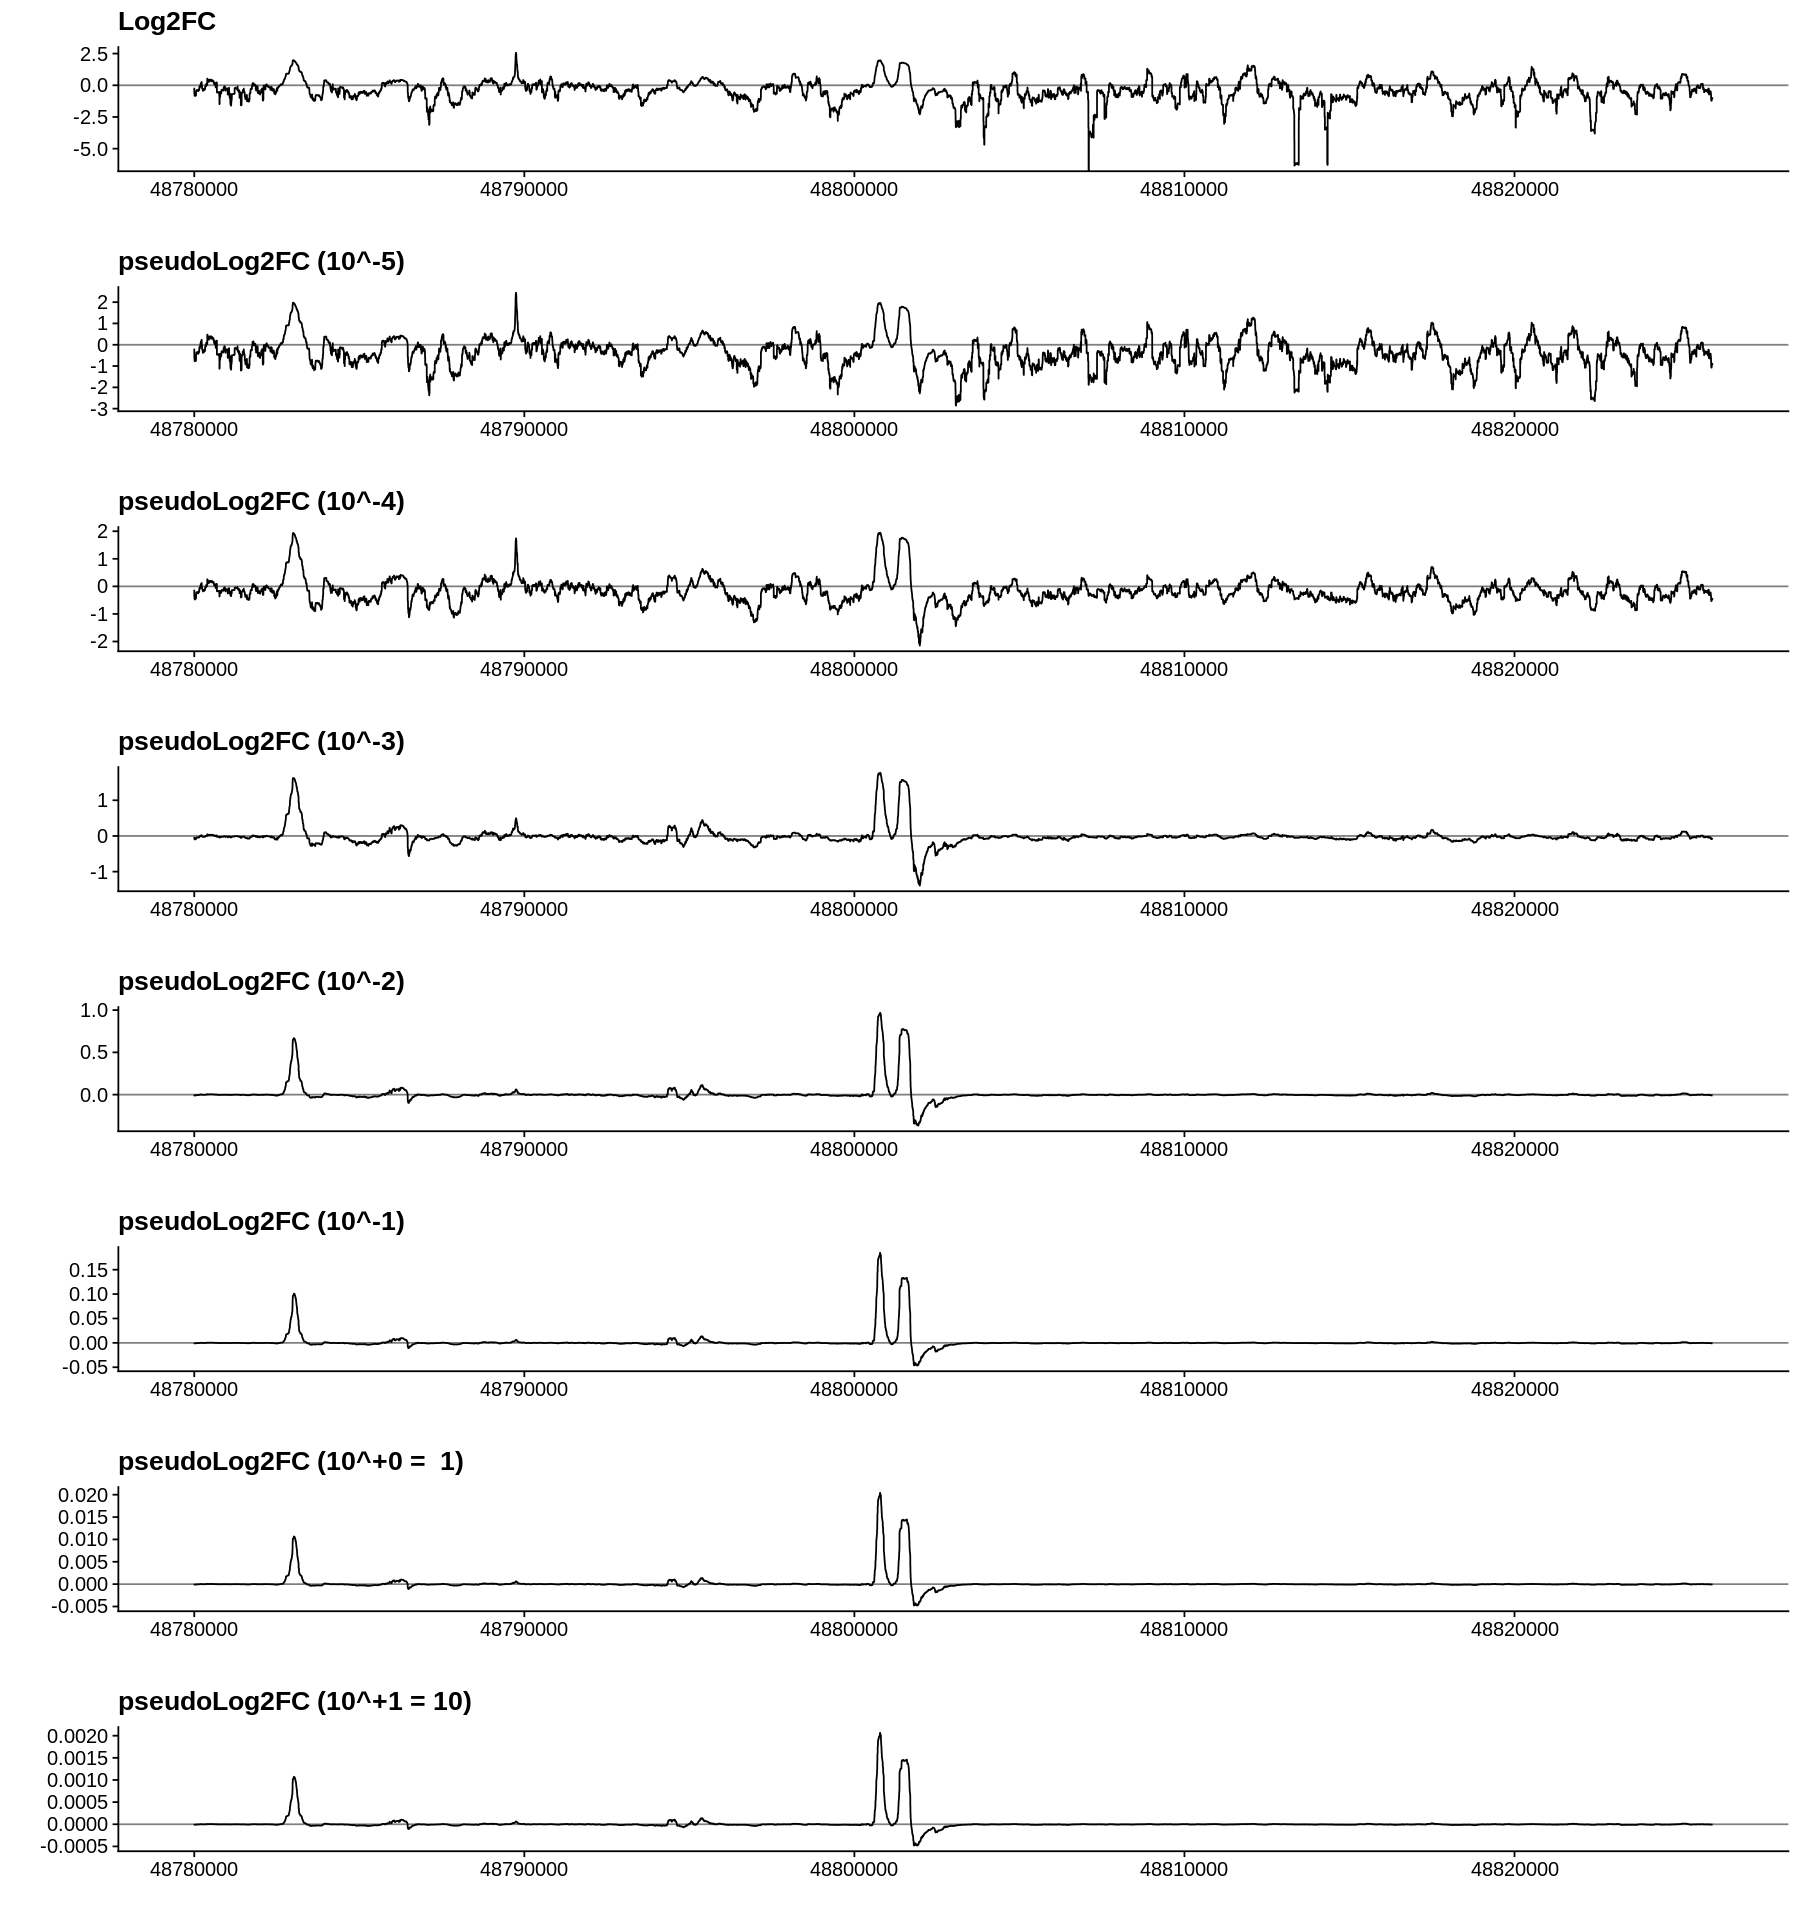

In [16]:
options(repr.plot.height=16, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

## Plot TMPRA

In [17]:
start  = 48780000
end    = 48826000

dat = dat_tmpra_gata1
dat = dat %>%
    dplyr::filter(Start >= start, Start <= end) %>%
    mutate(
        Log2FC = log2(FC),
        pLog2FC_1e2 = log2((Output+  10^+2) / (Input+  10^+2)),
        pLog2FC_5e2 = log2((Output+5*10^+2) / (Input+5*10^+2)),
        pLog2FC_1e3 = log2((Output+  10^+3) / (Input+  10^+3)),
        pLog2FC_1e4 = log2((Output+  10^+4) / (Input+  10^+4)),
        pLog2FC_1e5 = log2((Output+  10^+5) / (Input+  10^+5))
    )

###
dat$FC_Z = (dat$FC - mean(dat$FC)) / sd(dat$FC)

### show table
dat_cov_tmpra = dat
print(dim(dat))
head(dat)

[1] 46000    13


Chrom,Start,End,Input,Output,FC,Log2FC,pLog2FC_1e2,pLog2FC_5e2,pLog2FC_1e3,pLog2FC_1e4,pLog2FC_1e5,FC_Z
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,48780000,48780001,554,528,0.9530686,-0.06934805,-0.05852608,-0.03603460,-0.02434196,-0.003558494,-0.0003730823,-0.2203534
chrX,48780001,48780002,609,577,0.9474548,-0.07787091,-0.06662979,-0.04224112,-0.02898167,-0.004358187,-0.0004589409,-0.2206899
chrX,48780002,48780003,609,577,0.9474548,-0.07787091,-0.06662979,-0.04224112,-0.02898167,-0.004358187,-0.0004589409,-0.2206899
chrX,48780003,48780004,609,577,0.9474548,-0.07787091,-0.06662979,-0.04224112,-0.02898167,-0.004358187,-0.0004589409,-0.2206899
chrX,48780004,48780005,609,577,0.9474548,-0.07787091,-0.06662979,-0.04224112,-0.02898167,-0.004358187,-0.0004589409,-0.2206899
chrX,48780005,48780006,609,577,0.9474548,-0.07787091,-0.06662979,-0.04224112,-0.02898167,-0.004358187,-0.0004589409,-0.2206899


In [18]:
dat = dat_cov_tmpra
gp1 = ggplot() + geom_line(data=dat, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat, aes(x=Start, y=FC))
gp4 = ggplot() + geom_line(data=dat, aes(x=Start, y=Log2FC))
gp5 = ggplot() + geom_line(data=dat, aes(x=Start, y=pLog2FC_1e4))

lst = list(gp1, gp2, gp3, gp4, gp5)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = dat_ann$Color,
            alpha=0.5) +
        labs(x="") +
        theme_cowplot() 
    return(gpt)
})

lst[[1]] = lst[[1]] + labs(title="Tiling MPRA ChrX:48,780,000-48,826,000")
lst[[5]] = lst[[5]] + labs(y = "PseudoLog2FC\n(pcount=10,000)")

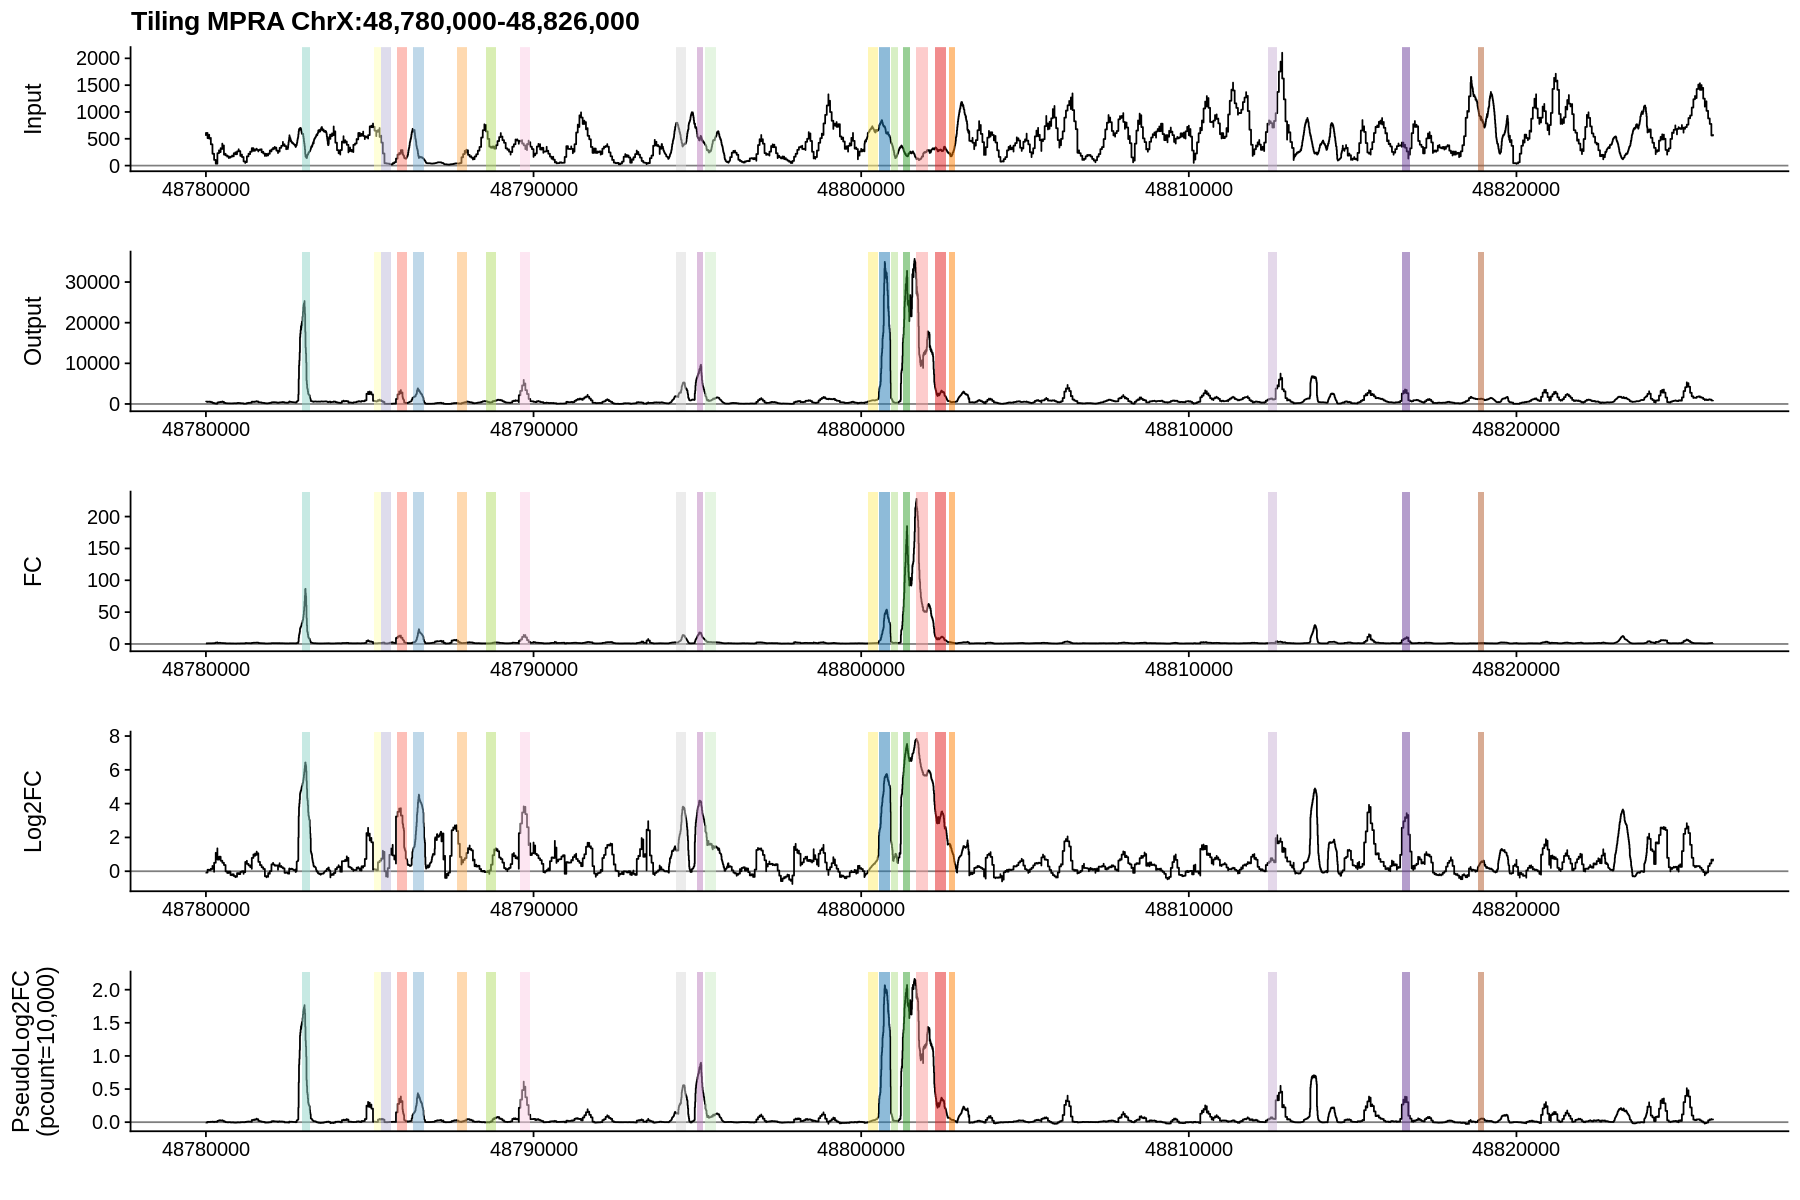

In [19]:
options(repr.plot.height=10, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [20]:
dat_cov = dat_cov_tmpra
gp1 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=FC))
gp4 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=FC_Z))

lst = list(gp1, gp2, gp3, gp4)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = dat_ann$Color,
            alpha=0.5) +
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

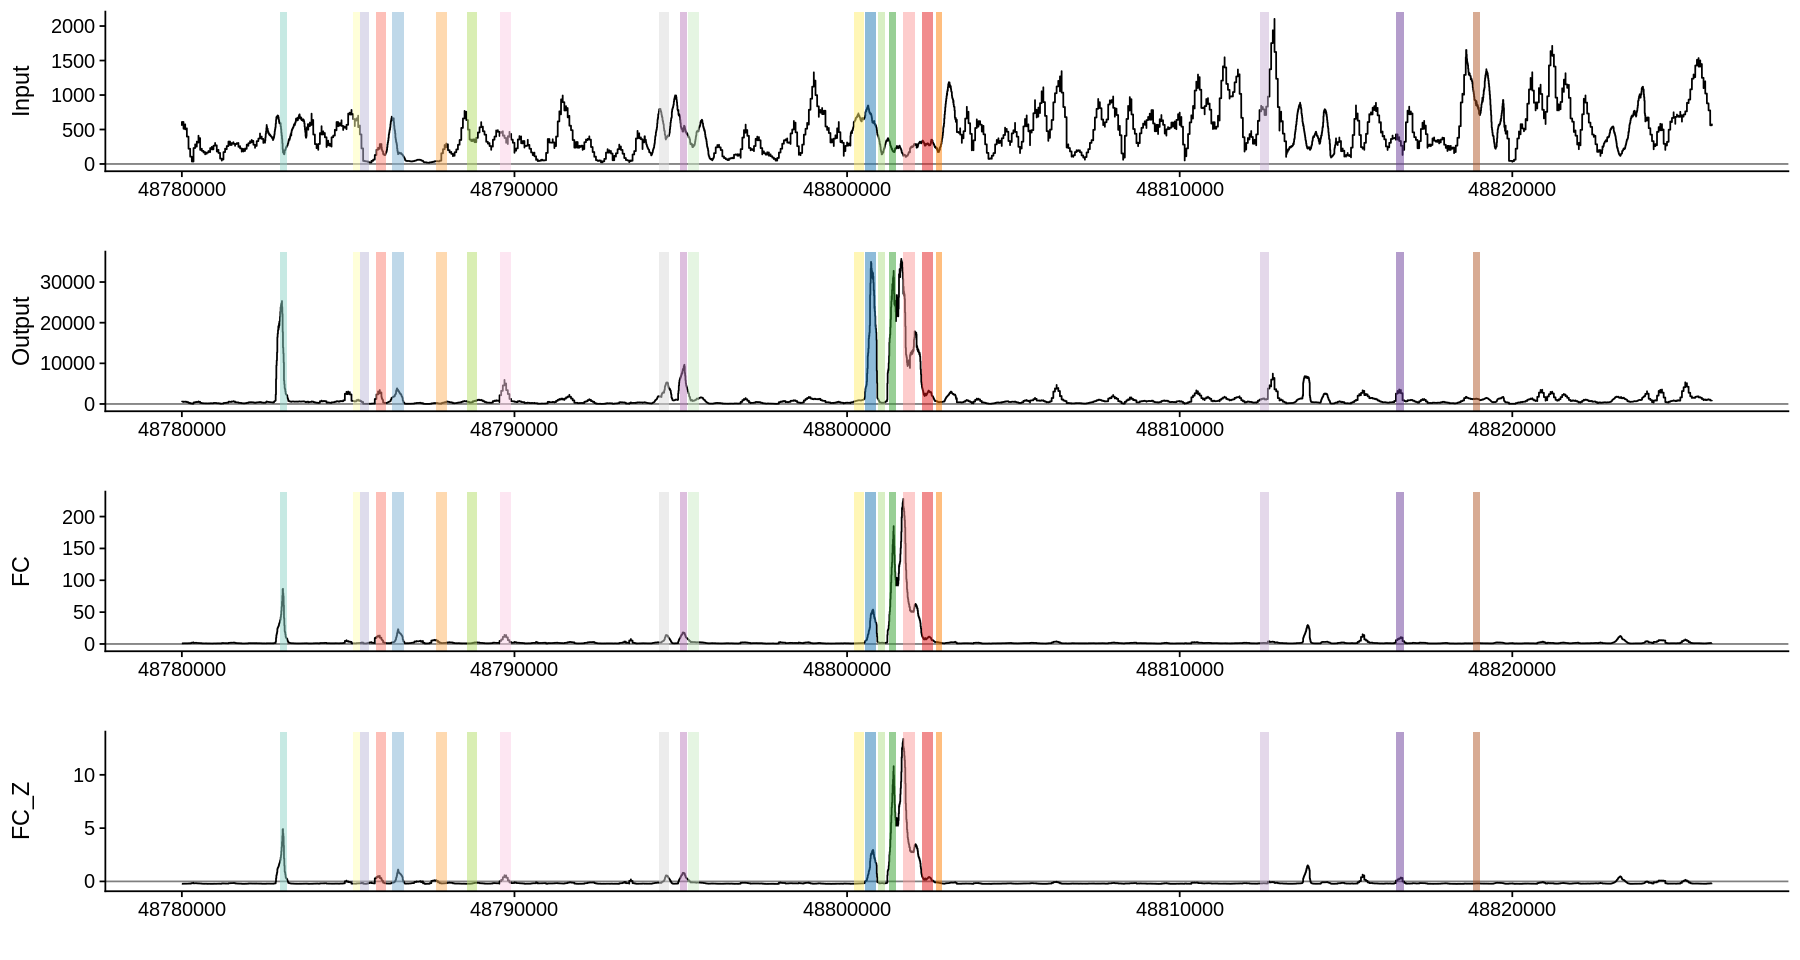

In [21]:
options(repr.plot.height=8, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [22]:
dat = dat_cov_tmpra
gp1 = ggplot(dat, aes(x=Start, y=Log2FC))
gp2 = ggplot(dat, aes(x=Start, y=pLog2FC_1e2))
gp3 = ggplot(dat, aes(x=Start, y=pLog2FC_5e2))
gp4 = ggplot(dat, aes(x=Start, y=pLog2FC_1e3))
gp5 = ggplot(dat, aes(x=Start, y=pLog2FC_1e4))
gp6 = ggplot(dat, aes(x=Start, y=pLog2FC_1e5))

lst = list(gp1, gp2, gp3, gp4, gp5, gp6)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        theme_cowplot()
    return(gpt)
})

txt = "pLog2FC = log2( (Output + cnt) / (Input + cnt) )"
lst[[1]] = lst[[1]] + labs(x="", y="", title="Log2FC")
lst[[2]] = lst[[2]] + labs(x="", y="", title="pseudoLog2FC:     100")
lst[[3]] = lst[[3]] + labs(x="", y="", title="pseudoLog2FC:     500")
lst[[4]] = lst[[4]] + labs(x="", y="", title="pseudoLog2FC:   1,000")
lst[[5]] = lst[[5]] + labs(x="", y="", title="pseudoLog2FC:  10,000")
lst[[6]] = lst[[6]] + labs(x="", y="", title="pseudoLog2FC: 100,000")

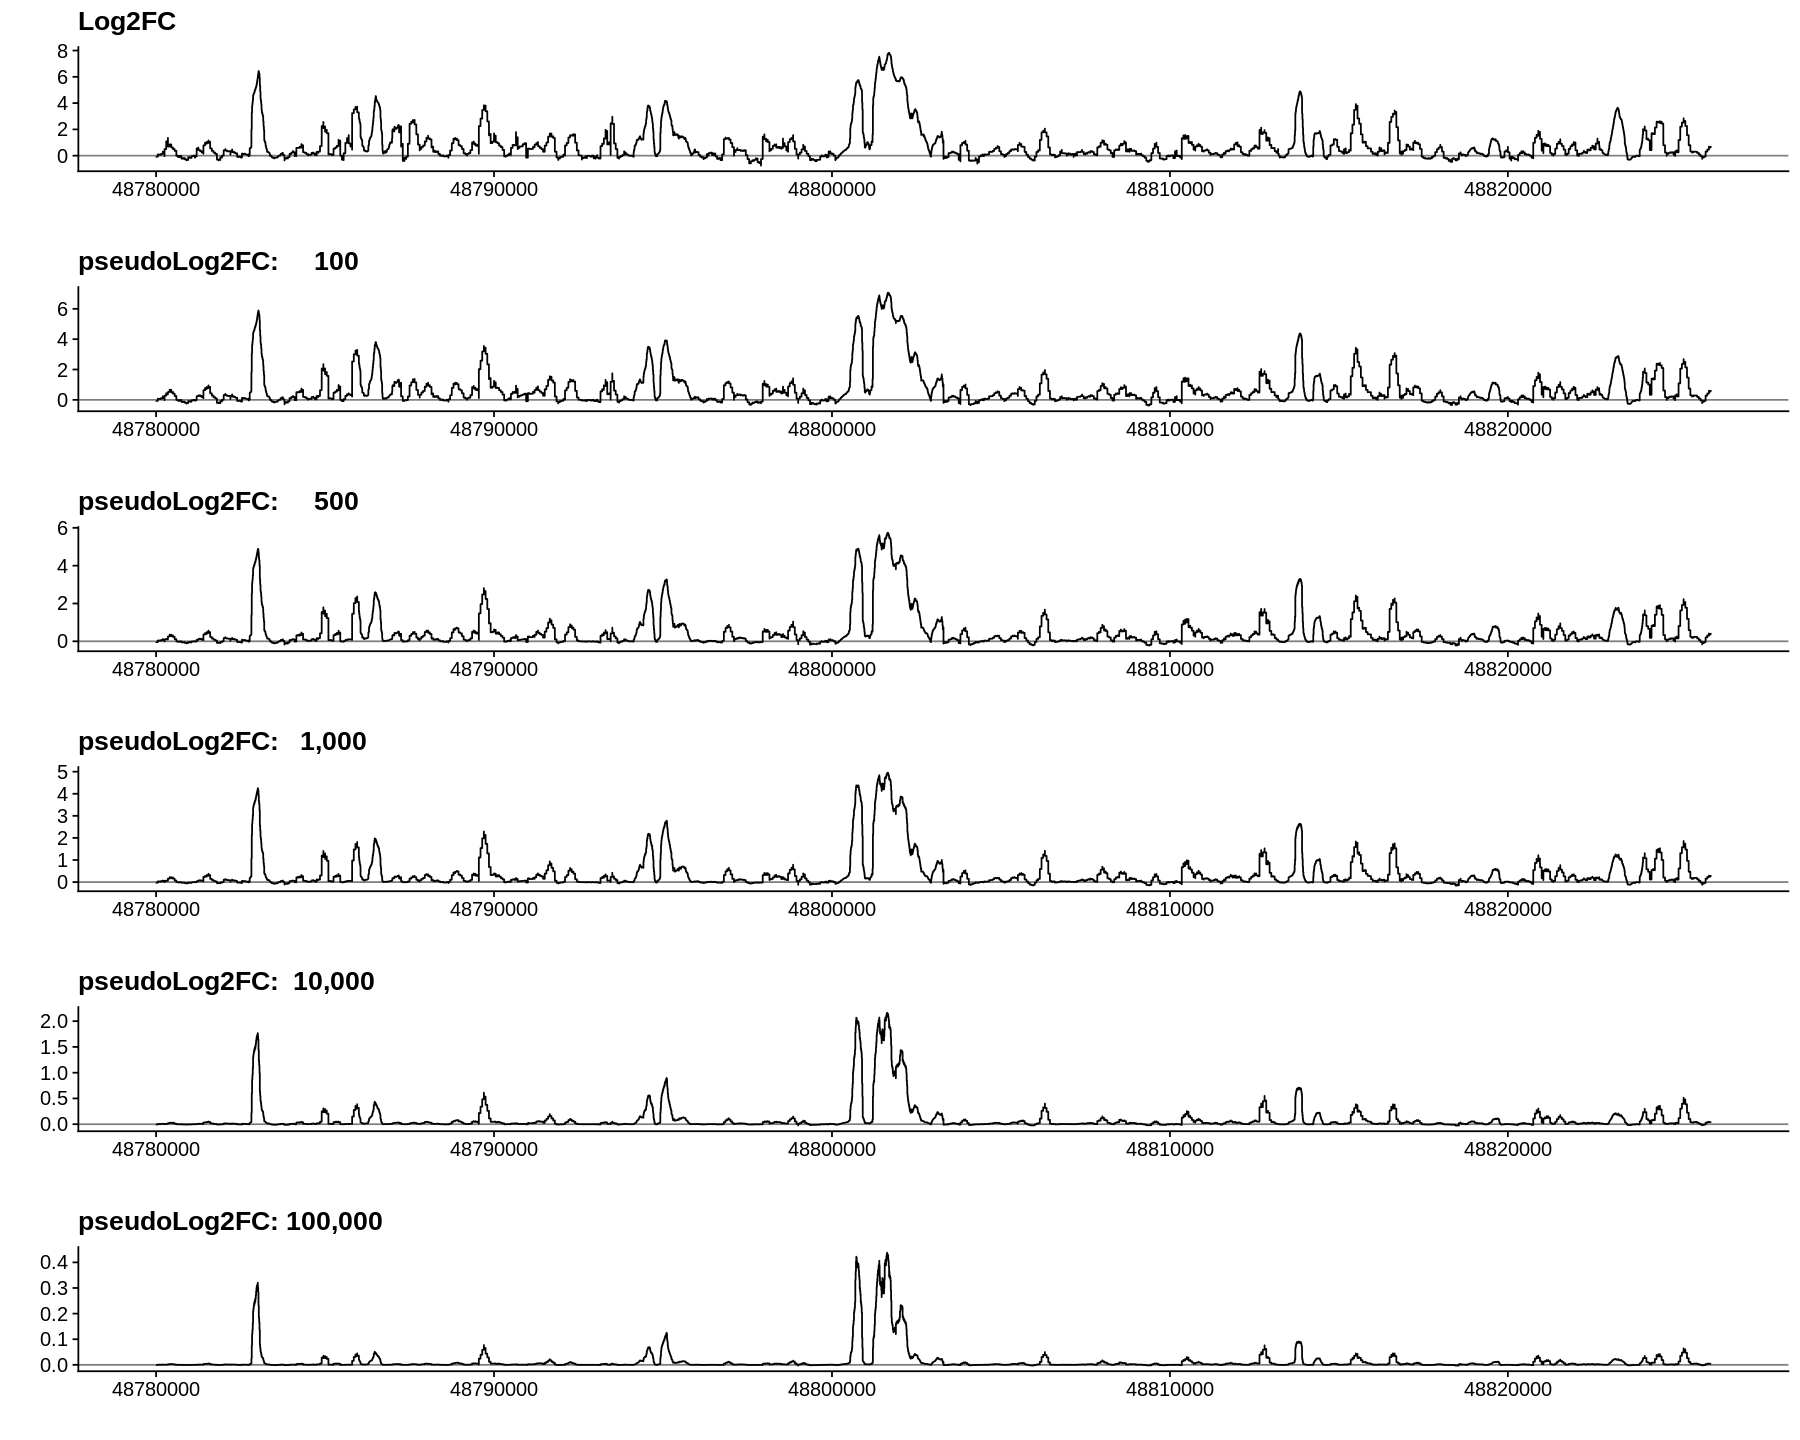

In [23]:
options(repr.plot.height=12, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [24]:
mean(dat$Input)

[1] 468.8797